In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import the data of the scenario 1 and the optimization function (optimal_location)
# Press shift + enter in each cell to run the commands

from netopt import netopt, print_dict, plot
from scenario_1 import warehouses, customers, distance

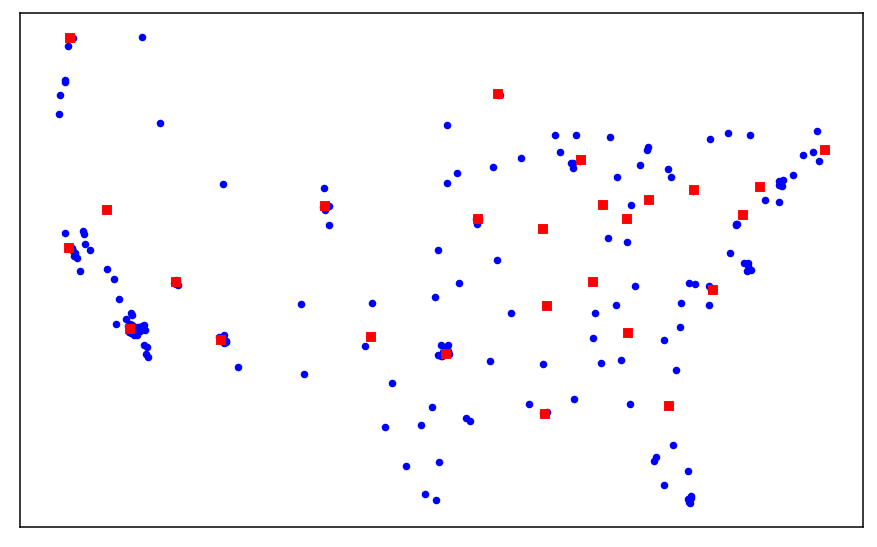

In [3]:
plot(customers=customers, warehouses=warehouses)

In [ ]:
# Get the optmimal location of num_warehouses warehouses
# You can change the value of parameter num_warehouses to test different scenario
# The parameter warehouses, customers, customer_demands and distance are loaded in the previous cell
# By setting the parameter plot to True, the function returns a simplyfied picture of the solution along with a summary of the performance. 
# If you don't want the picture, set plot to False.
# Outflow in the results represents the quantity exiting from each warehouse.

results = optimal_location(num_warehouses=3,
                           warehouses=warehouses,
                           customers=customers,
                           distance=distance,
                           plot=True)

In [ ]:
# By adding the parameter distance_ranges the functions returns the % of the demand
# within the passed distance ranges. For example, if distance_ranges = [0, 100, 200]
# the functions return the percentage of demand in the ranges [0, 100], (100, 200], (200, 99999]
# where 99999 is used to represent a very long distance (i.e. infinite distance).
# By changing the parameter num_warehouses and distance_ranges you can test different scenarios.
# The parameter distance_ranges must be a list of increasing numbers. If you do not pass 0 as the first value
# it will be automatically added

results = optimal_location(num_warehouses=3,
                           warehouses=warehouses,
                           customers=customers,
                           distance=distance,
                           distance_ranges=[0, 100, 400, 800, 3200],
                           plot=True)

In [ ]:
# The results variable contains a summary of the optimization report

print(results)

In [ ]:
# For a slightly better visualization of the results use print_dict as follows

print_dict(results)

In [ ]:
# It is also possible to force warehouses to be open (for example, to force using the current warehouse)
# of closed (to avoid the selection of some candidate).
# The warehouses are references through their id, and must be passed as list [] (even for a single value, that is
# to force closed the warehouse with id 1 you should pass forced_closed=[1])


results = optimal_location(num_warehouses=6,
                           warehouses=warehouses,
                           customers=customers,
                           distance=distance,
                           forced_open=[1],
                           forced_closed=[8, 3],
                           plot=True)

In [ ]:
# The id of the warehouses if the value on the left of the colon in the warehouses python variable

print_dict(warehouses)